<h1>Regression - Analysis data by ANN<h1>

In [5]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt 
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

First, we load in our dataframes in our notebook. \
"train_x" is our attributes and "train_y" is our the true values for training part. \
"test_x" is our attributes and "test_y" is our the true values for testing part.

In [6]:
train_x = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/independent_train.csv")
train_y = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/dependent_train.csv")
test_x = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/independent_test.csv")
test_y = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/dependent_test.csv")
train_x.head(5)

,age,education-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,-0.596105,-1.436812,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.029636,1.854382,0.038178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.209024,0.867024,0.038178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.255474,-0.120334,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.494133,0.867024,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_y.head(5)

,income
0,0
1,1
2,0
3,0
4,1


In [8]:
test_x.head(5)

,age,education-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,1.339301,-1.765931,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.571549,-0.449454,1.821682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.952220,1.525263,0.929930,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.184468,-2.095050,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.952220,-0.120334,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_y.head(5)

,income
0,0
1,0
2,1
3,0
4,0


In [10]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(256, 25)
(256, 1)
(64, 25)
(64, 1)


In [11]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [12]:
class ANN_Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_hidden_layers):
        super(ANN_Model, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_hidden_layers = num_hidden_layers
        self.flatten = nn.Flatten()
        
        self.input_layer = nn.Linear(self.input_dim, self.hidden_dim)
        self.hidden_layers = nn.ModuleList([
            nn.Linear(self.hidden_dim, self.hidden_dim) for _ in range(self.num_hidden_layers)
        ])
        self.output_layer = nn.Sequential(
            nn.Linear(self.hidden_dim, 1), 
            nn.Sigmoid()  
        )
    
    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x
    

In [13]:
input_dim = 25
hidden_dim = 256
num_hidden_layers = 5

model = ANN_Model(input_dim, hidden_dim, num_hidden_layers).to(device)
print(model)

ANN_Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (input_layer): Linear(in_features=25, out_features=256, bias=True)
  (hidden_layers): ModuleList(
    (0-4): 5 x Linear(in_features=256, out_features=256, bias=True)
  )
  (output_layer): Sequential(
    (0): Linear(in_features=256, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [14]:
train_Tenx = torch.Tensor(train_x.to_numpy())
train_Teny = torch.Tensor(train_y.to_numpy())
test_Tenx = torch.Tensor(test_x.to_numpy())
test_Teny = torch.Tensor(test_y.to_numpy())

print(train_Tenx.shape)
print(train_Teny.shape)
print(test_Tenx.shape)
print(test_Teny.shape)

torch.Size([256, 25])
torch.Size([256, 1])
torch.Size([64, 25])
torch.Size([64, 1])


In [15]:
dataset_train = TensorDataset(train_Tenx, train_Teny)
dataset_test = TensorDataset(test_Tenx, test_Teny)

dataloader_train = DataLoader(dataset_train, batch_size = 64, shuffle = True)
dataloader_test = DataLoader(dataset_test, batch_size = 64, shuffle = False)

100%|██████████| 10/10 [00:12<00:00,  1.22s/it]


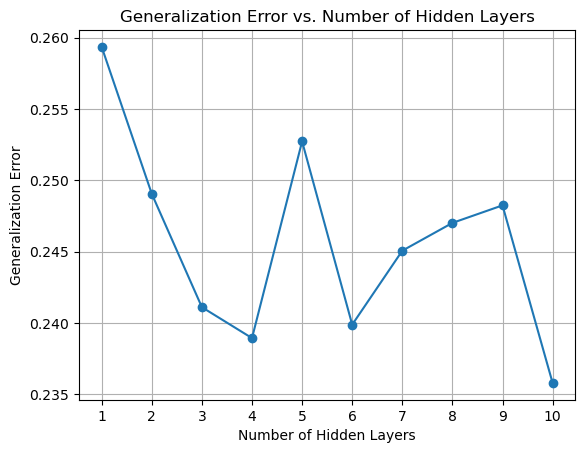

In [16]:
num_epochs = 30
input_dim = 25
hidden_dim = 64

generalization_errors_list = []
hidden_layers_list = np.arange(1, 11)

criterion = nn.BCELoss()

for hidden_layers in tqdm(hidden_layers_list):
    fold_errors = []
    
    model = ANN_Model(input_dim, hidden_dim, hidden_layers - 1).to(device)
    
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        model.train()
        for data, labels in dataloader_train:
            data = data.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    model.eval()
    with torch.no_grad():
        squared_loss = 0
        total_samples = 0
        for inputs, labels in dataloader_test:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            squared_loss += ((outputs - labels)**2).sum().item()
            total_samples += labels.size(0)
        mse = squared_loss / total_samples
        fold_errors.append(mse)
    
    
    generalization_error = sum(fold_errors) / len(fold_errors)
    generalization_errors_list.append(generalization_error)


#best_structure_index = generalization_errors_list.index(min(generalization_errors_list))
#best_structure = hidden_layer_structures[best_structure_index]

# print the result
#print("Generalization Errors:")
#for i, error in enumerate(generalization_errors_list):
#    print(f"Hidden Layers: {hidden_layer_structures[i]}, Generalization Error: {error:.4f}")

#print("Best Hidden Layer Structure:", best_structure)


# plot the diagrams
#hidden_layer_count = [len(structure) for structure in hidden_layer_structures]
plt.plot(hidden_layers_list, generalization_errors_list, marker='o')
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Generalization Error")
plt.title("Generalization Error vs. Number of Hidden Layers")
plt.xticks(hidden_layers_list)
plt.grid()
plt.show()


<h2>If we choose different hidden layers' dimention to compare<h2>

In [20]:
def Analysis(num_epochs, input_dim, hidden_dim): 
    
    generalization_errors_list = []
    hidden_layers_list = np.arange(1, 11)

    criterion = nn.BCELoss()

    for hidden_layers in tqdm(hidden_layers_list):
        fold_errors = []
        
        model = ANN_Model(input_dim, hidden_dim, hidden_layers - 1).to(device)
        
        optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
        
        for epoch in range(num_epochs):
            model.train()
            for data, labels in dataloader_train:
                data = data.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                outputs = model(data)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
        
        model.eval()
        with torch.no_grad():
            squared_loss = 0
            total_samples = 0
            for inputs, labels in dataloader_test:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                squared_loss += ((outputs - labels)**2).sum().item()
                total_samples += labels.size(0)
            mse = squared_loss / total_samples
            fold_errors.append(mse)
        
        
        generalization_error = sum(fold_errors) / len(fold_errors)
        generalization_errors_list.append(generalization_error)


    #best_structure_index = generalization_errors_list.index(min(generalization_errors_list))
    #best_structure = hidden_layer_structures[best_structure_index]

    # print the result
    #print("Generalization Errors:")
    #for i, error in enumerate(generalization_errors_list):
    #    print(f"Hidden Layers: {hidden_layer_structures[i]}, Generalization Error: {error:.4f}")

    #print("Best Hidden Layer Structure:", best_structure)


    # plot the diagrams
    #hidden_layer_count = [len(structure) for structure in hidden_layer_structures]
    plt.plot(hidden_layers_list, generalization_errors_list, marker='o')
    plt.xlabel("Number of Hidden Layers")
    plt.ylabel("Generalization Error")
    plt.title("Generalization Errors with different layers (Hidden layers' dimention: {})".format(hidden_dim))
    plt.xticks(hidden_layers_list)
    plt.grid()
    plt.show()


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


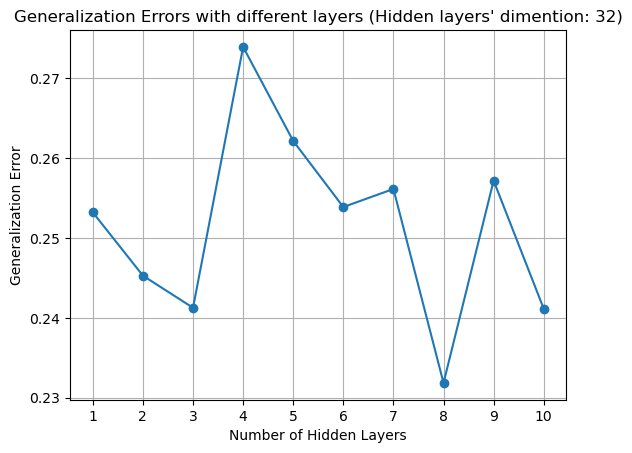

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


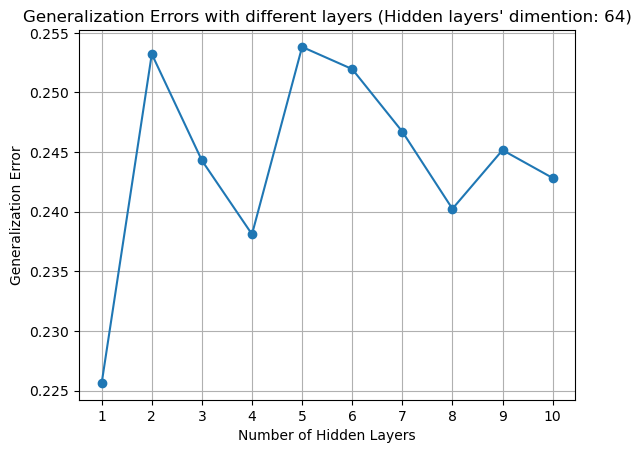

100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


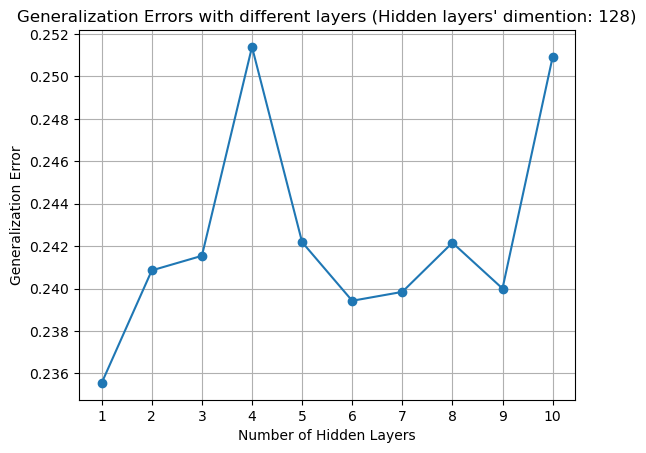

100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


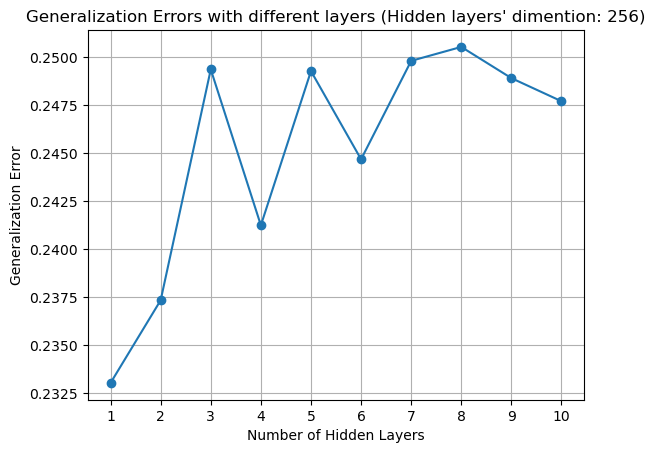

In [21]:
num_epochs = 30
input_dim = 25
hidden_dim_list = [32, 64, 128, 256]

for hidden_dim in hidden_dim_list:
    Analysis(num_epochs, input_dim, hidden_dim)